In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist


In [2]:
# Cargar y preprocesar datos
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [3]:
# Definir la arquitectura del autoencoder
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)  # Capa codificadora
decoded = Dense(784, activation='sigmoid')(encoded)  # Capa decodificadora


In [4]:
# Compilar el modelo
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [5]:
# Entrenar el modelo
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))



Epoch 1/50
235/235 [==============================] - 4s 6ms/step - loss: 0.2137 - val_loss: 0.1366
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1186 - val_loss: 0.1029
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0964 - val_loss: 0.0887
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0856 - val_loss: 0.0812
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0798 - val_loss: 0.0771
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0762 - val_loss: 0.0742
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0739 - val_loss: 0.0725
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0723 - val_loss: 0.0713
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0711 - val_loss: 0.0701
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0702 - val_loss: 0.0694

In [6]:
# Reconstruir imágenes de prueba
decoded_imgs = autoencoder.predict(x_test)


313/313 [==============================] - 1s 1ms/step


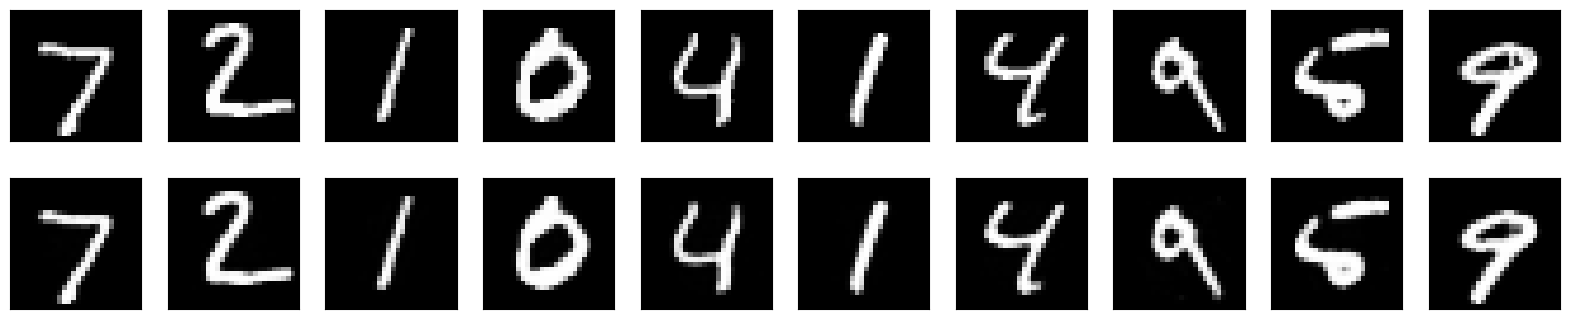

In [7]:
# Mostrar algunas imágenes originales y sus reconstrucciones
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imágenes originales
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imágenes reconstruidas
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()